## Redes neuronales con California Housings

## Librerías

In [38]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.datasets import fetch_california_housing

# Redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Descarga de datos

In [6]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

feature_names = housing.feature_names

## Crear el DF

In [10]:
df = pd.DataFrame(X, columns= feature_names)

df['Price'] = y

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Primera exploración

In [12]:
print(f"Tamaño del dataset {df.shape}")
print("\nInfromación de las columnas:")
print(df.info())
print("\nEstadisticas descriptivas:")
print(df.describe())

Tamaño del dataset (20640, 9)

Infromación de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadisticas descriptivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.46

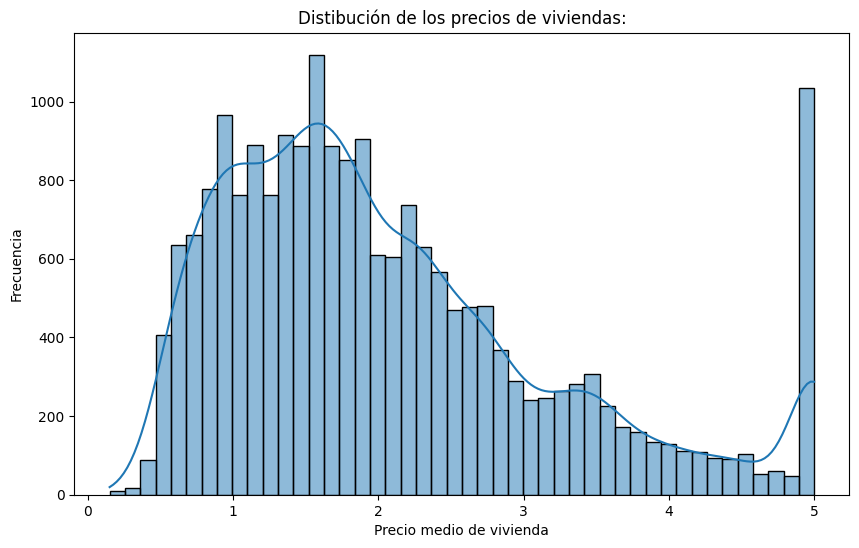

In [16]:
# Visualización de la distribución de precios

plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Distibución de los precios de viviendas:')
plt.xlabel('Precio medio de vivienda')
plt.ylabel('Frecuencia');


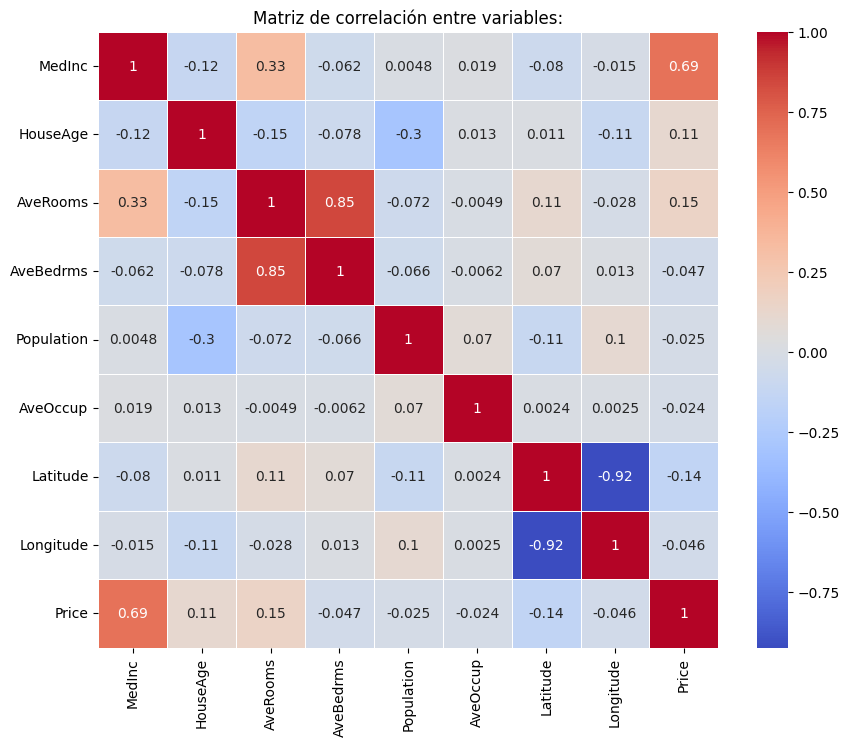

In [18]:
# Matriz de correlación

plt.figure(figsize=(10,8))
correlacion_matrix = df.corr()
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths= 0.5)
plt.title('Matriz de correlación entre variables:');
## Preparación de datos

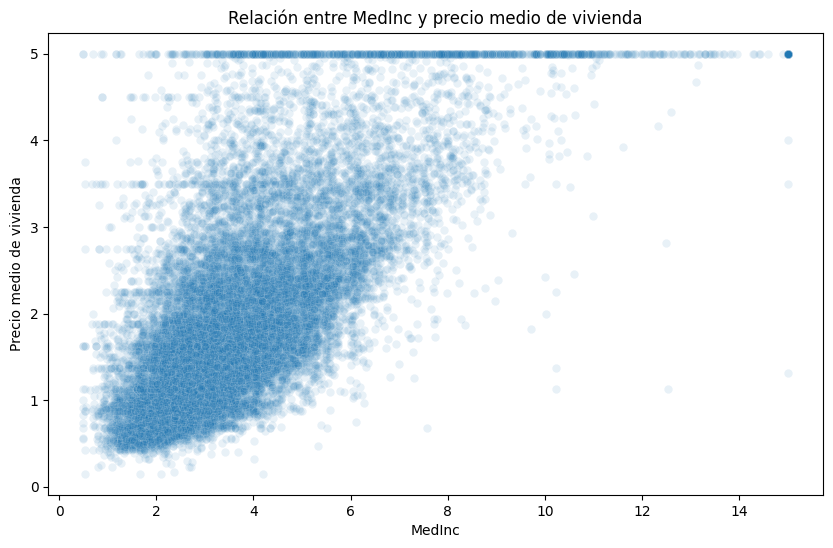

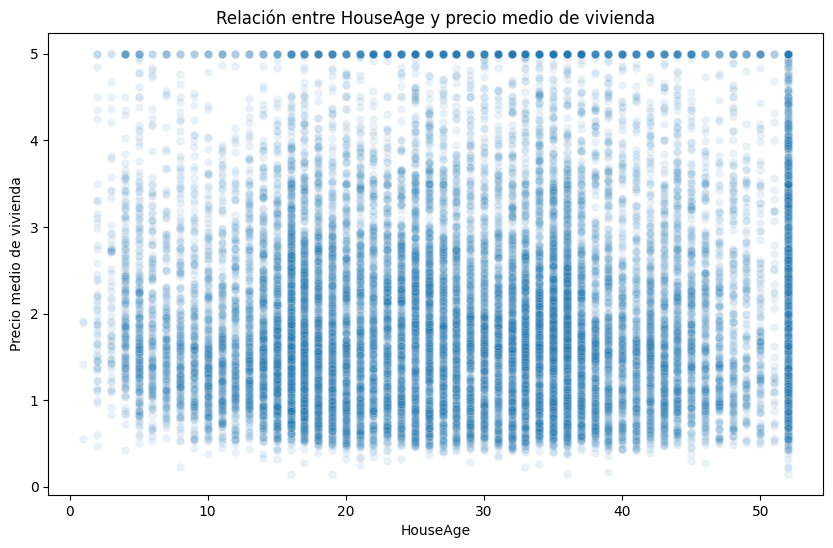

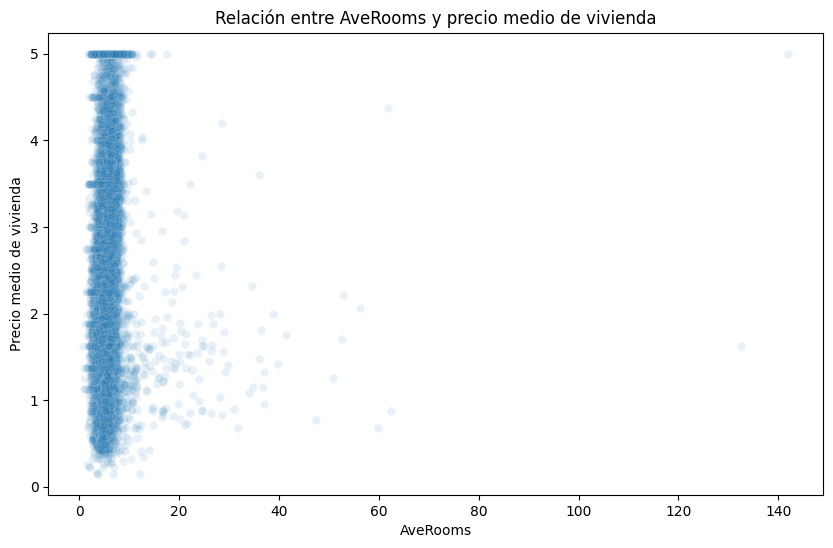

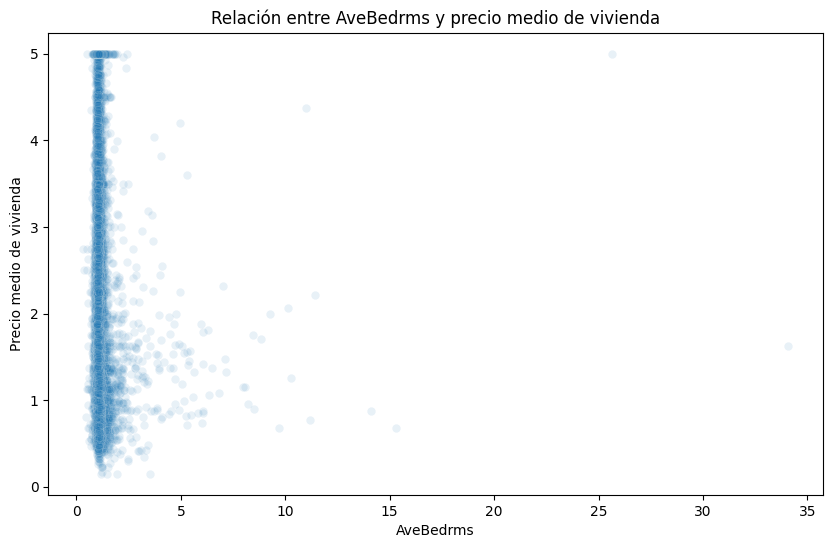

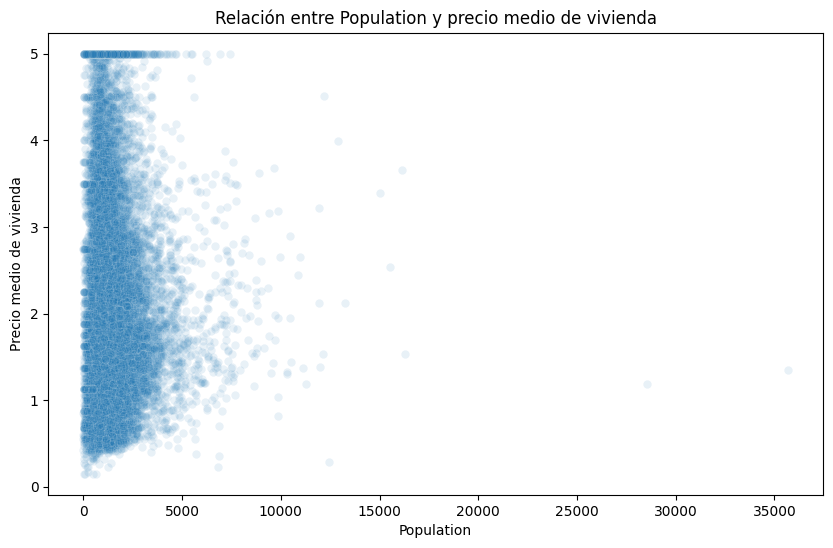

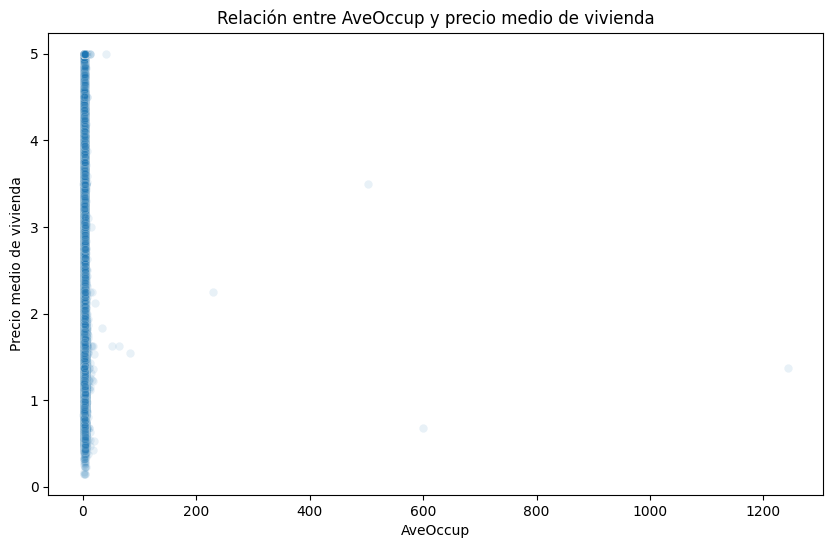

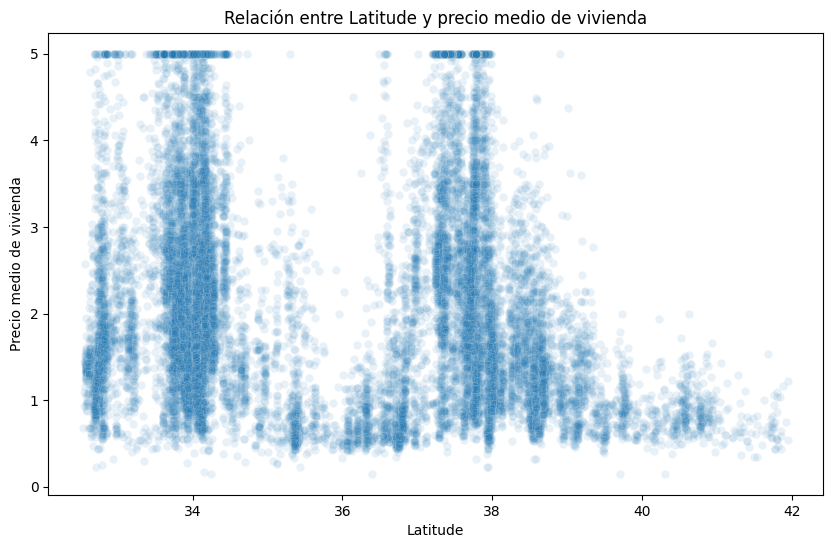

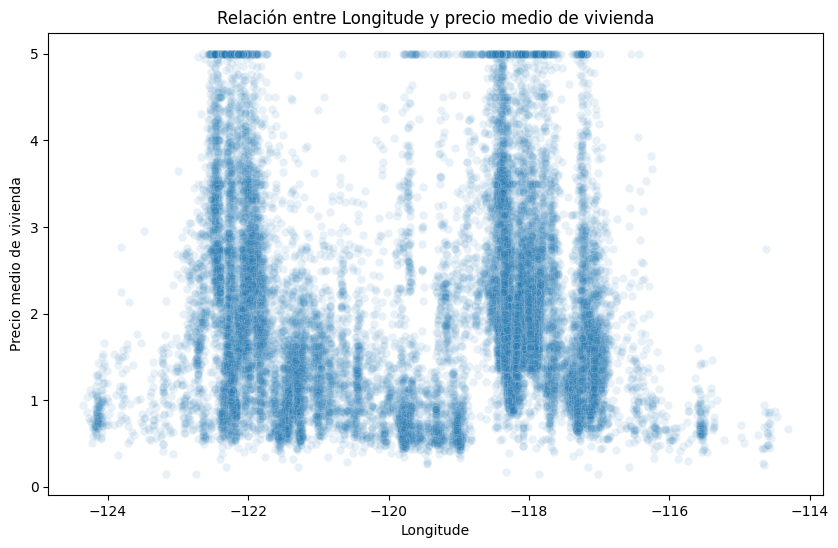

In [20]:
# Visualizaciones de relaciones entre caracteristicas feature y price
for feature in feature_names:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature], y=df['Price'], alpha= 0.1) # El alpha es para la trasparencia
    plt.title(f'Relación entre {feature} y precio medio de vivienda')
    plt.xlabel(feature)
    plt.ylabel('Precio medio de vivienda')
    plt.show()

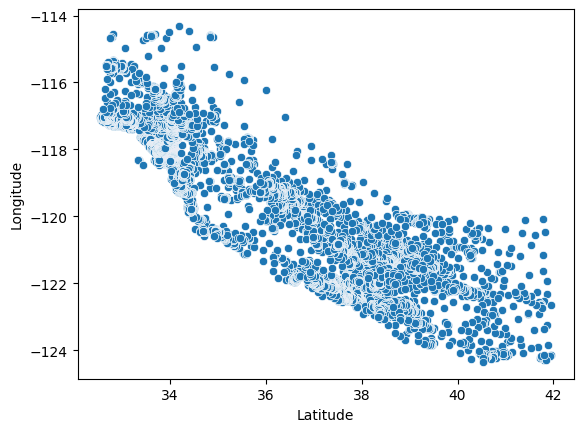

In [22]:
sns.scatterplot(x=df['Latitude'], y=df['Longitude']);

## Preprocesado de datos

In [ ]:
# El escaldo se hace justo despues del train test split

In [30]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construir modelo

In [31]:
def build_model(input_shape, learning_rate=0.001):
    model = keras.models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)), # Despues de la coma no va nada porque es un dataframe
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1),

    ])

    optimizador = keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(
        optimizer=optimizador,
        loss='mse',
        metrics=['mae']
    )

    return model

In [32]:
model = build_model(X_train_scaled.shape[1]) # [1] son las columnas
model.summary()

c:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\7-DeepLearning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
# Callback de entrenamiento

early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta = 0.001,
    restore_best_weights=True,
    monitor = 'val_loss'
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor=0.2,
    patience=10,
    min_lr=0.00001,
    monitor='val_loss',
)

In [34]:
# Entrenar el modelo

history = model.fit(
    X_train_scaled,
    y_train,
    validation_split = 0.2,
    epochs = 300,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4186 - mae: 0.8879 - val_loss: 0.6202 - val_mae: 0.5517 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7079 - mae: 0.6329 - val_loss: 0.4929 - val_mae: 0.4741 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6248 - mae: 0.5810 - val_loss: 0.5025 - val_mae: 0.4794 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5380 - mae: 0.5360 - val_loss: 0.5634 - val_mae: 0.4731 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4962 - mae: 0.5133 - val_loss: 0.4076 - val_mae: 0.4388 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4909 - mae: 0.5079 - val_loss: 0.4218 - val_mae: 0.4447 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4692 - mae: 0.4951 - val_loss: 0.3692 - val_mae: 0.4232 - learning_rate: 0.0010

In [36]:
model.evaluate(X_test_scaled, y_test, verbose = 0)

[0.28351691365242004, 0.3618593215942383]

In [39]:
test_mse, test_mae = model.evaluate(X_test_scaled, y_test, verbose = 0)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)


print(f'Test Mean Scuared Error (MSE): {mse:.4f}')
print(f'Test Root Mean Squared Error (RMSE): {rmse*100_000:.4f}')
print(f'Test Mean Absolute Percentage Error (MAPE): {mape:.4f}')
print(f'Test Mean Absolute Error (MAE): {mae:.4f}')
print(f'Test R-squared: {R2:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Mean Scuared Error (MSE): 0.2835
Test Root Mean Squared Error (RMSE): 53246.3041
Test Mean Absolute Percentage Error (MAPE): 0.2018
Test Mean Absolute Error (MAE): 0.3619
Test R-squared: 0.7909


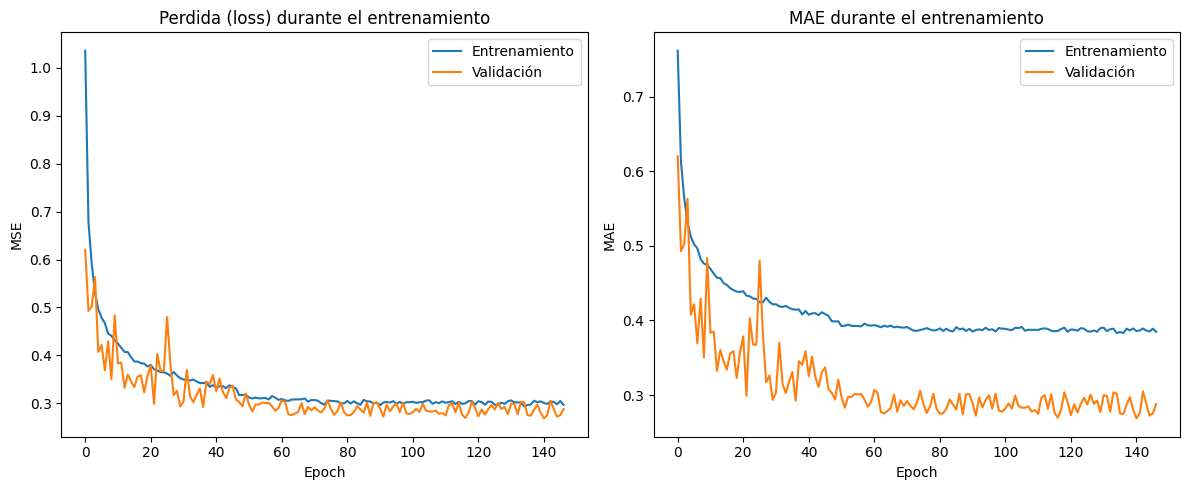

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Entrenamiento')
plt.plot(history.history['val_loss'], label = 'Validación')
plt.title('Perdida (loss) durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend();

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label = 'Entrenamiento')
plt.plot(history.history['val_loss'], label = 'Validación')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend();

plt.tight_layout()
plt.show()

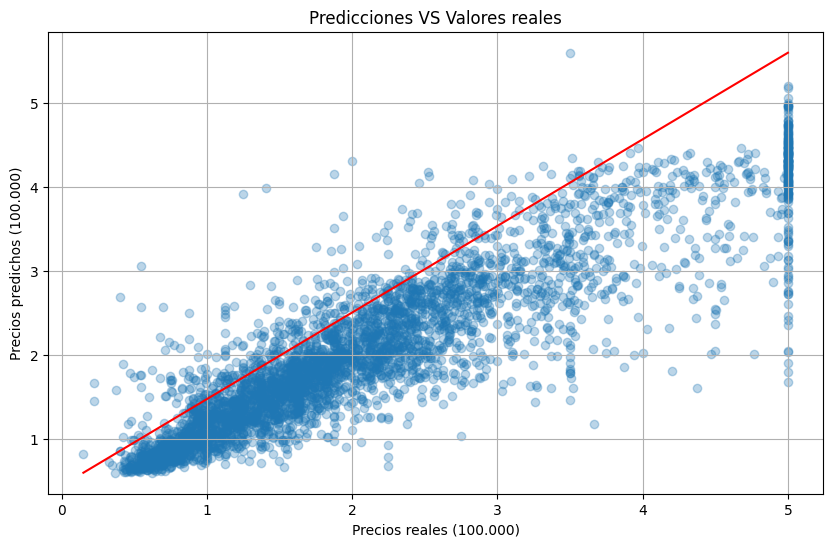

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color = 'r')
plt.xlabel('Precios reales (100.000)')
plt.ylabel('Precios predichos (100.000)')
plt.title('Predicciones VS Valores reales')
plt.grid(True)
plt.show();

# Lo idela sería que todos lo puntos estén spbre la linea roja

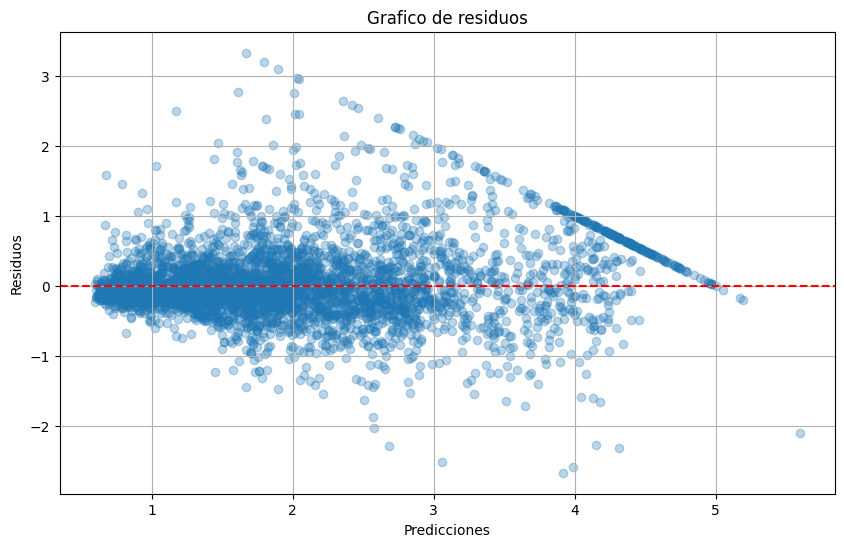

In [46]:
residuos = y_test - y_pred.flatten()
plt.figure(figsize=(10,6))

plt.scatter(y_pred, residuos, alpha = 0.3)
plt.axhline(y = 0, color = 'r', linestyle = '--')

plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Grafico de residuos')
plt.grid(True)
plt.show();


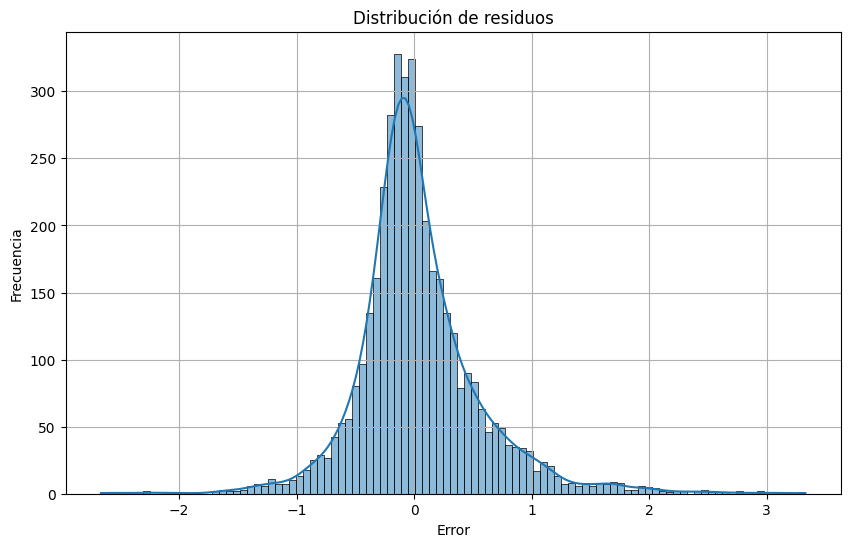

In [47]:
plt.figure(figsize = [10,6])
sns.histplot(residuos, kde = True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de residuos')
plt.grid(True)
plt.show();

# Los residuos están bastante bien porque tienen una distribucion aparentemente normal